In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [63]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [64]:
df = pd.read_csv("../Folder2/Population_byCDCAgeGroup_byState.csv")

In [65]:
df1 = df.loc[df.CDC_AgeGroups == "Total"][["State","Population"]]
df1.count()

State         50
Population    50
dtype: int64

In [66]:
df2 = pd.read_csv("Land_Area_byState.csv")
df2

,State,Land_Area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [67]:
a = df2.loc[45,"State"]
len(a)
a[1:len(a)]

'New Hampshire'

In [68]:
for index, rows in  df2.iterrows():
    state = df2.loc[index,"State"]
    new_state = state[1:len(state)]
    df2.loc[index, "State"] = new_state
df_merge = df2.merge(df1, how='inner', on="State")
df2.head(50)

,State,Land_Area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [69]:
# df_merge = df2.merge(df1, how='inner', on="State")
import numpy as np
df_merge["Pop_Density"]=""
df_merge["log_Pop_Density"]=""
for index, rows in  df_merge.iterrows():
    pop_density = df_merge.loc[index,"Population"]/df_merge.loc[index,"Land_Area"]
    df_merge.loc[index,"Pop_Density"]=pop_density
    state = df_merge.loc[index,"State"]
    df_merge.loc[index,"State"] = us_state_abbrev[state]
    df_merge.loc[index,"log_Pop_Density"] = np.log2(pop_density)
    
df_merge.head(50)

,State,Land_Area,Population,Pop_Density,log_Pop_Density
0,AK,570640.95,731545.0,1.28197,0.358363
1,TX,261231.71,28995881.0,110.997,6.79437
2,CA,155779.22,39512223.0,253.642,7.98665
3,MT,145545.80,1068778.0,7.34324,2.87642
4,NM,121298.15,2096829.0,17.2866,4.11158
5,AZ,113594.08,7278717.0,64.0766,6.00172
6,NV,109781.18,3080156.0,28.0572,4.8103
7,CO,103641.89,5758736.0,55.5638,5.79607
8,OR,95988.01,4217737.0,43.9402,5.45747
9,WY,97093.14,578759.0,5.96086,2.57552


In [70]:
np.log10(10)

1.0

In [71]:
df4 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv",skiprows=[0,1,2])
df4.rename(columns={"Unnamed: 1":"Death_Rate"}, inplace = True)
df_merge_1 = df_merge.merge(df4,how='inner', on="State")

In [72]:
df5.head()

,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,0.043606,0.063322,1.452128,0.521335,0.757045
1,UT,0.073363,0.106704,1.454459,0.554209,0.806074
2,NE,0.145057,0.143926,0.992200,1.020306,1.012348
3,VT,0.034616,0.029556,0.853828,1.071802,0.915134
4,ID,0.113035,0.122320,1.082147,1.090293,1.179857


In [73]:
df5 = pd.read_csv("../Folder4/Output/Adj_for_age_Death_Rate.csv")
df5.drop(columns=("Unnamed: 0"),inplace=True)
df6 = df5[["State","Adj_for_age_Covid_Death_Rate"]]
df_merge_2 = df_merge_1.merge(df6,on="State")

In [74]:
df_merge_2.head()

,State,Land_Area,Population,Pop_Density,log_Pop_Density,Death_Rate,Adj_for_age_Covid_Death_Rate
0,AK,570640.95,731545.0,1.28197,0.358363,0.521335,0.757045
1,TX,261231.71,28995881.0,110.997,6.79437,1.707011,2.140165
2,CA,155779.22,39512223.0,253.642,7.98665,1.662034,1.799573
3,MT,145545.80,1068778.0,7.34324,2.87642,1.443708,1.306006
4,NM,121298.15,2096829.0,17.2866,4.11158,2.056814,1.990243


In [75]:
df_merge_1.sort_values(by="Pop_Density",ascending=False)
df_merge.count()

State              50
Land_Area          50
Population         50
Pop_Density        50
log_Pop_Density    50
dtype: int64

0.19694076020172951


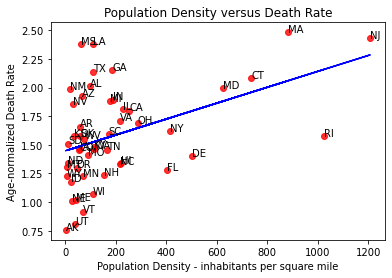

In [288]:
import numpy as np
x1 = df_merge_2.Pop_Density.astype(float)
y1 = df_merge_2.Adj_for_age_Covid_Death_Rate
plt.scatter(x1, y1, color="red",alpha=0.8)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
for index, row in df_merge_3.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[3],row[6]))
plt.plot(x1,regress_values,"b-")
print(rvalue**2)
plt.title("Population Density versus Death Rate")
plt.xlabel("Population Density - inhabitants per square mile")
plt.ylabel("Age-normalized Death Rate")
plt.savefig("../Folder4/Output/population_density.png")
plt.show()

In [78]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder1'

In [82]:
df_merge_2.to_csv("../Folder4/Output/geographical_analysis.csv")

In [284]:
df7 = pd.read_csv("../Folder4/Output/Mask_Mandate%_byState.csv",index_col=False)
df7.drop(columns=("Unnamed: 0"),inplace=True)
df_merge_3 = df_merge_2.merge(df7,on="State")
df_merge_3.sort_values(by="Pop_Density").head()

,State,Land_Area,Population,Pop_Density,log_Pop_Density,Death_Rate,Adj_for_age_Covid_Death_Rate,Mask_Mandate
0,AK,570640.95,731545.0,1.28197,0.358363,0.521335,0.757045,0.000000
9,WY,97093.14,578759.0,5.96086,2.57552,1.215988,1.225120,22.849167
3,MT,145545.80,1068778.0,7.34324,2.87642,1.443708,1.306006,71.236667
18,ND,69000.80,762062.0,11.0442,3.46522,1.387973,1.344131,38.055833
16,SD,75811.00,884659.0,11.6693,3.54464,1.603620,1.511646,0.000000


In [176]:
a=

0.10485388361515337


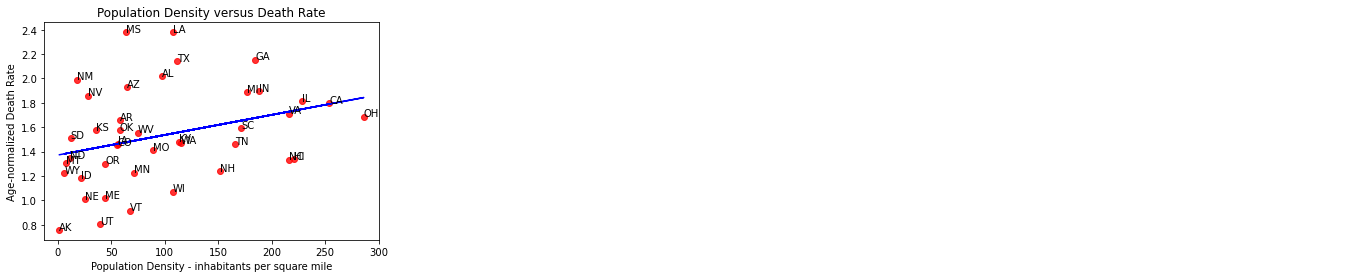

In [286]:
a = 400
b = 0
# df_merge_3.loc[lambda x: x.Mask_Mandate == a][["State","Pop_Density","Adj_for_age_Covid_Death_Rate"]]
x2 = df_merge_3.loc[lambda x: (x.Pop_Density < a) & (x.Pop_Density > b)]["Pop_Density"].astype(float)
y2 = df_merge_3.loc[lambda x: (x.Pop_Density < a) & (x.Pop_Density > b)]["Adj_for_age_Covid_Death_Rate"]
plt.scatter(x2, y2, color="red",alpha=0.8)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
for index, row in df_merge_3.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[3],row[6]))
plt.plot(x2,regress_values,"b-")
print(rvalue**2)
plt.title("Population Density versus Death Rate")
plt.xlabel("Population Density - inhabitants per square mile")
plt.ylabel("Age-normalized Death Rate")
plt.show()

In [238]:
x

2     253.642
21    400.519
24    228.243
26    412.795
27    215.725
32    286.072
33    216.143
40    622.801
41    220.451
42    883.647
45    1207.77
46    736.271
47     499.74
48    1024.72
Name: Pop_Density, dtype: object

0.46391289398063557


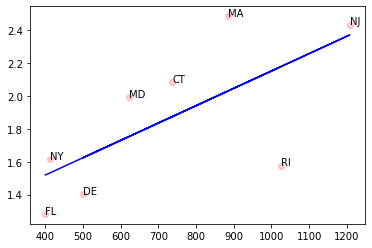

In [283]:
a = 300
# df_merge_3.loc[lambda x: x.Mask_Mandate == a][["State","Pop_Density","Adj_for_age_Covid_Death_Rate"]]
x = df_merge_3.loc[lambda x: x.Pop_Density > a]["Pop_Density"].astype(float)
y = df_merge_3.loc[lambda x: x.Pop_Density > a]["Adj_for_age_Covid_Death_Rate"]
#plt.scatter(df_merge_2.Pop_Density, df_merge_2.Adj_for_age_Covid_Death_Rate, color="black",alpha=0.2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, color="red",alpha=0.2)
for index, row in df_merge_3.loc[lambda x: x.Pop_Density > a].iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[3],row[6]))
plt.plot(x,regress_values,"b-")
print(rvalue**2)